# Spam detection

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import plot_confusion_matrix

In [3]:
dataset = pd.read_csv('train.csv')

In [82]:
dataset

,response,make,address,all,num3d,our,over,remove,internet,order,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,1,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.0,0.925,0.000,0.000,1.833,6,11
1,2,0.00,0.0,0.00,0.0,2.94,0.00,0.0,0.00,0.0,...,0.0,0.335,0.335,0.0,0.671,0.000,0.000,4.000,12,28
2,2,0.00,0.0,1.15,0.0,0.38,0.38,0.0,0.00,0.0,...,0.0,0.000,0.196,0.0,0.261,0.000,0.000,5.666,56,272
3,2,0.10,0.3,0.40,0.0,0.20,0.90,0.2,0.50,0.8,...,0.0,0.000,0.175,0.0,0.307,0.175,0.014,6.937,669,1214
4,1,0.10,0.0,0.00,0.0,0.00,0.10,0.0,0.52,0.0,...,0.0,0.027,0.138,0.0,0.041,0.041,0.000,2.321,31,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,2,0.00,0.0,0.00,0.0,1.35,0.45,0.0,0.00,0.0,...,0.0,0.000,0.138,0.0,0.138,0.000,0.000,5.809,46,122
3097,1,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.718,11,55
3098,2,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.147,0.000,0.0,0.294,0.147,0.000,2.333,11,63
3099,1,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,...,0.0,0.000,0.000,0.0,0.000,0.000,0.000,5.500,10,11


In [4]:
X = dataset.iloc[:, 1:58].values
y = dataset.iloc[:, 0].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
dataset.corr()['response']

response             1.000000
make                 0.147265
address             -0.039448
all                  0.184118
num3d                0.055557
our                  0.257900
over                 0.218296
remove               0.326527
internet             0.203471
order                0.240505
mail                 0.136794
receive              0.257405
will                -0.000143
people               0.137473
report               0.053976
addresses            0.195960
free                 0.253857
business             0.256711
email                0.214692
you                  0.265155
credit               0.183769
your                 0.385492
font                 0.087789
num000               0.333608
money                0.215304
hp                  -0.260044
hpl                 -0.233153
george              -0.182789
num650              -0.147946
lab                 -0.138005
labs                -0.169544
telnet              -0.136861
num857              -0.114281
data      

### PCA

[0.96599547 0.99860753 0.99991041 0.99994027 0.99995044 0.99995705
 0.99996223 0.9999669  0.99997026 0.99997268]


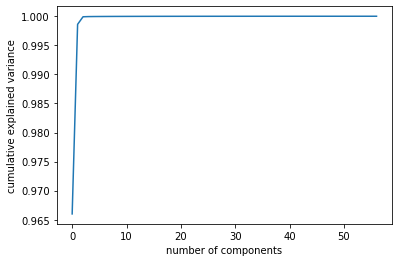

In [11]:
pca = PCA()
pca.fit(X)
print(np.cumsum(pca.explained_variance_ratio_)[:10])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

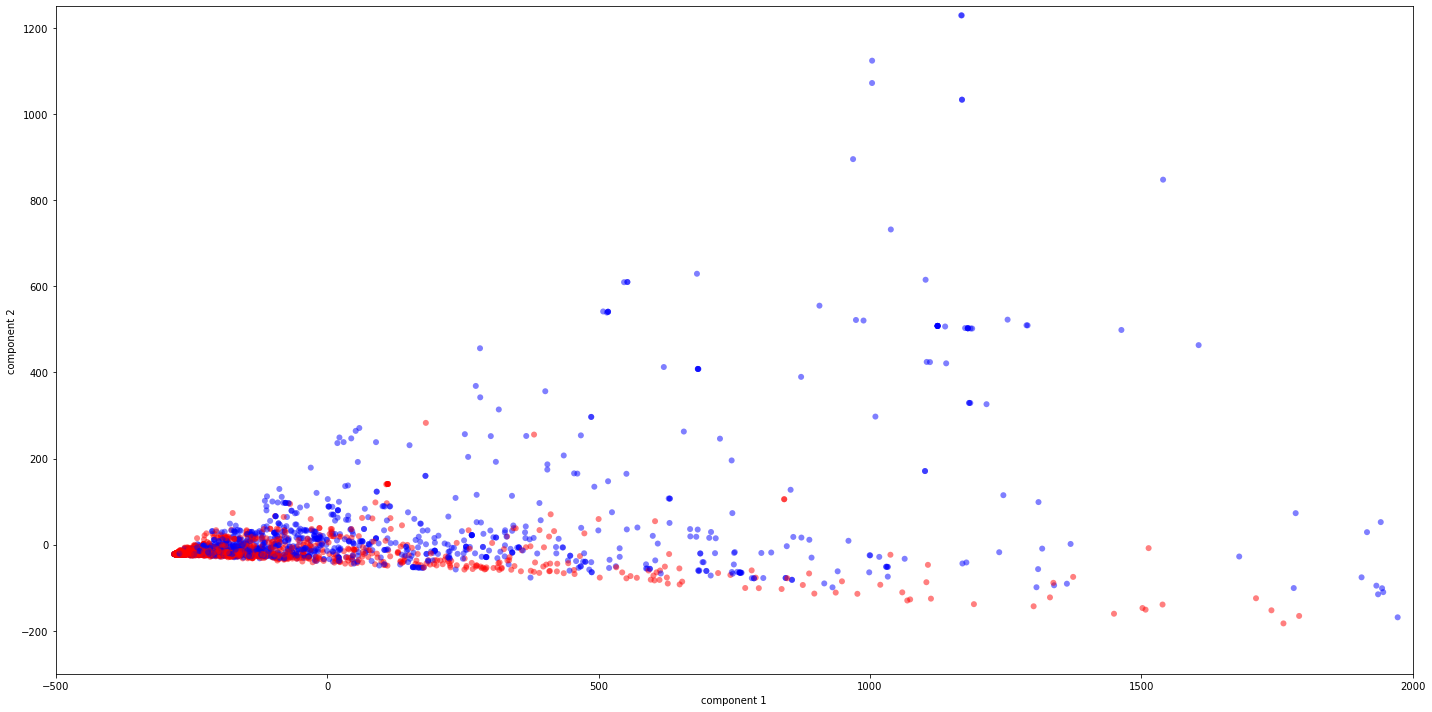

In [186]:
color = []

for i in range(len(y)):
    if y[i] == 1:
        color.append('red')
    elif y[i] == 2:
        color.append('blue')

pca = PCA(2)
projected = pca.fit_transform(X)
plt.figure(figsize=(20,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=color, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.xlim(-500,2000)
plt.ylim(-300,1250)

plt.tight_layout()

# Gradient Boosting

In [27]:
gb_clf2 = GradientBoostingClassifier()
param_test1 = {'n_estimators':[200,300],
              'learning_rate':[0.03,0.05,0.1],
              'random_state':[0,42],
          'max_features':['auto', 'log2']}
gsearch1 = GridSearchCV(gb_clf2, param_grid = param_test1)
gsearch1.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.03, 0.05, 0.1],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [200, 300], 'random_state': [0, 42]})

In [28]:
gsearch1.best_params_

{'learning_rate': 0.1,
 'max_features': 'log2',
 'n_estimators': 300,
 'random_state': 0}

In [34]:
model1 = GradientBoostingClassifier(learning_rate = 0.1,
                                    max_features = 'log2',
                                    n_estimators = 300,
                                    random_state = 0)

model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = cross_val_score(model1, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy for Gradient Boosting: {}'.format(accuracy))

Accuracy for Gradient Boosting: 0.952597240950109


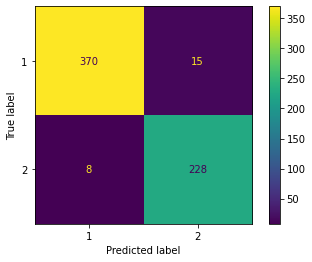

 
Precision score for Gradient Boosting: 0.9788359788359788


In [39]:
plot_confusion_matrix(model1, X_test, y_test)  
plt.show()
print(' ')
print('Precision score for Gradient Boosting: {}'.format(metrics.precision_score(y_test, y_pred)))

The lowest score we were able to reach is 36 with threshold 0.8200000000000003
 


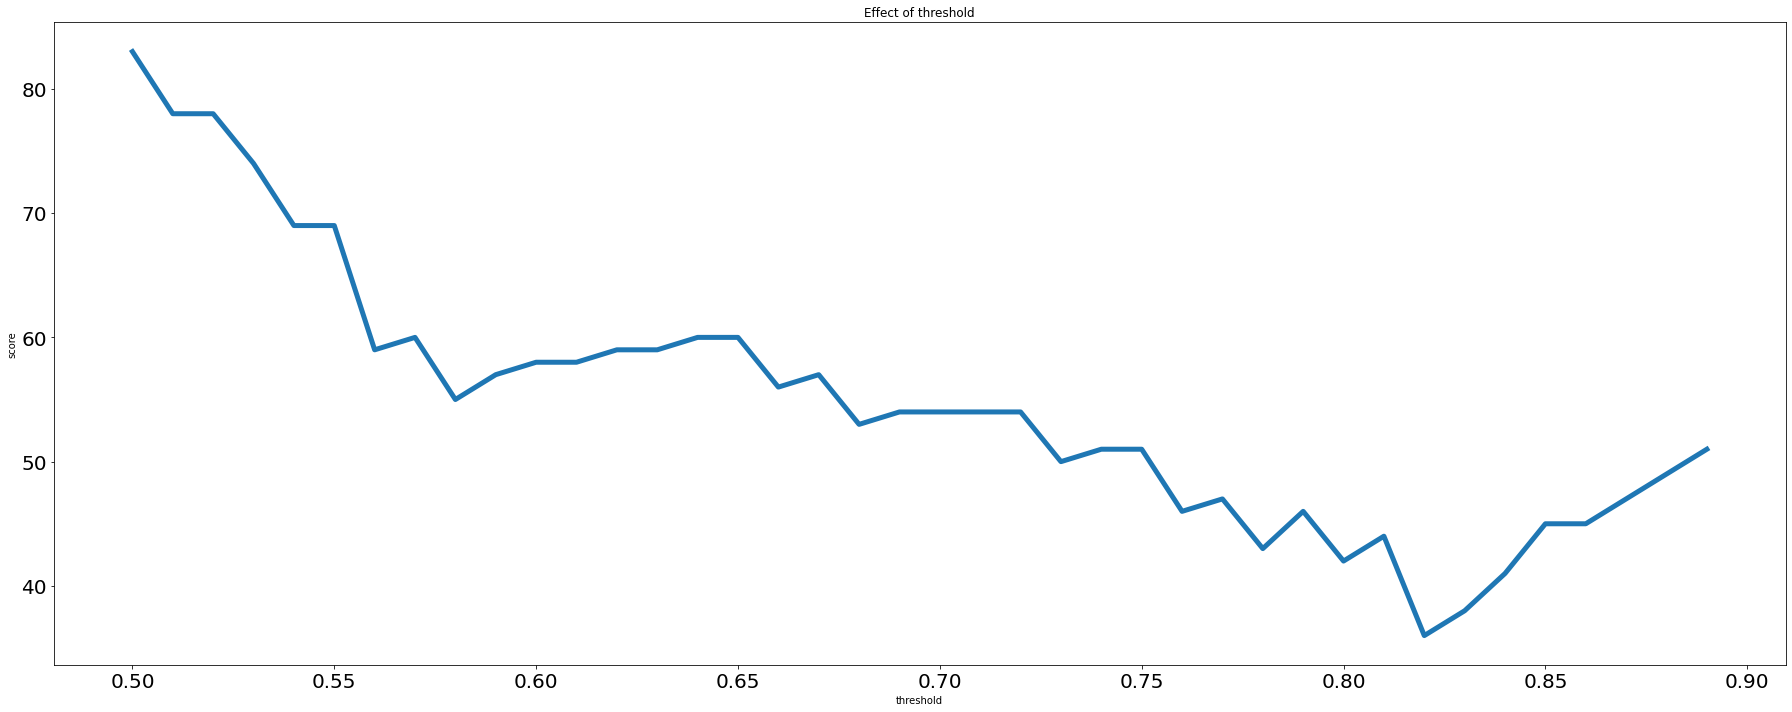

In [25]:
'''
Here, we give a lot of weight to correctly classify a NON-spam email. Our goal is not to discard a true email.
'''

model1 = GradientBoostingClassifier(learning_rate = 0.1,
                                    max_features = 'log2',
                                    n_estimators = 300,
                                    random_state = 0)
model1.fit(X_train, y_train)

def scores(y_pred,y_test):
    return 5*(confusion_matrix(y_test,y_pred)[1][0])+(confusion_matrix(y_test,y_pred)[0][1])

gradientprob = model1.predict_proba(X_test)
gradientboostingprob = gradientprob[:, 1].reshape(-1, 1).copy()

P = np.zeros((len(X_test),1),dtype = int)
threshold = np.arange(0.5,0.9,0.01)
SCORE = []

for j in range(len(threshold)):
    for i in range(len(P)):
        if gradientboostingprob[i] >= threshold[j]:
            P[i] = 2
        elif gradientboostingprob[i] < threshold[j]:
            P[i] = 1
    SCORE.append((threshold[j],scores(y_test,P)))

score = [i[1] for i in SCORE]
thresholds = [i[0] for i in SCORE]

print('The lowest score we were able to reach is {} with threshold {}'.format(score[np.argmin(score)],thresholds[np.argmin(score)]))
print(' ')
plt.figure(figsize=(25,10))
plt.title("Effect of threshold")
plt.xlabel("threshold")
plt.ylabel("score")
plt.plot(threshold, score, linewidth=5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tight_layout()

In [183]:
P = np.zeros((len(X_test),1),dtype = int)

for j in range(len(threshold)):
    for i in range(len(P)):
        if gradientboostingprob[i] >= 0.82:
            P[i] = 2
        elif gradientboostingprob[i] < 0.82:
            P[i] = 1

confusion_matrix(P,y_test)

array([[384,  31],
       [  1, 205]], dtype=int64)

# Random Forest

In [41]:
classifier = RandomForestClassifier()

param_test2 = {'n_estimators': [200, 300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [5,7,9],
               'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=classifier, param_grid=param_test2, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [42]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 300}

In [97]:
model2 = RandomForestClassifier(max_depth = 9,
                                max_features = 'auto',
                                n_estimators = 300,
                                random_state = 0,
                                criterion = 'gini')

model2.fit(X_train, y_train)
y_pred = model1.predict(X_test)

accuracy = cross_val_score(model2, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy for Random Forest: {}'.format(accuracy))

Accuracy for Random Forest: 0.9387324966289803


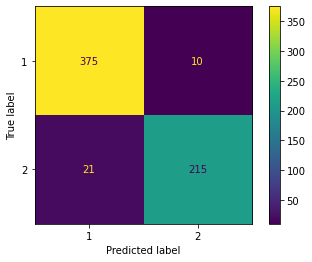

 
Precision score for Random Forest: 0.9788359788359788


In [98]:
plot_confusion_matrix(model2, X_test, y_test)  
plt.show()
print(' ')
print('Precision score for Random Forest: {}'.format(metrics.precision_score(y_test, y_pred)))

The lowest score we were able to reach is 43 with threshold 0.6900000000000002
 


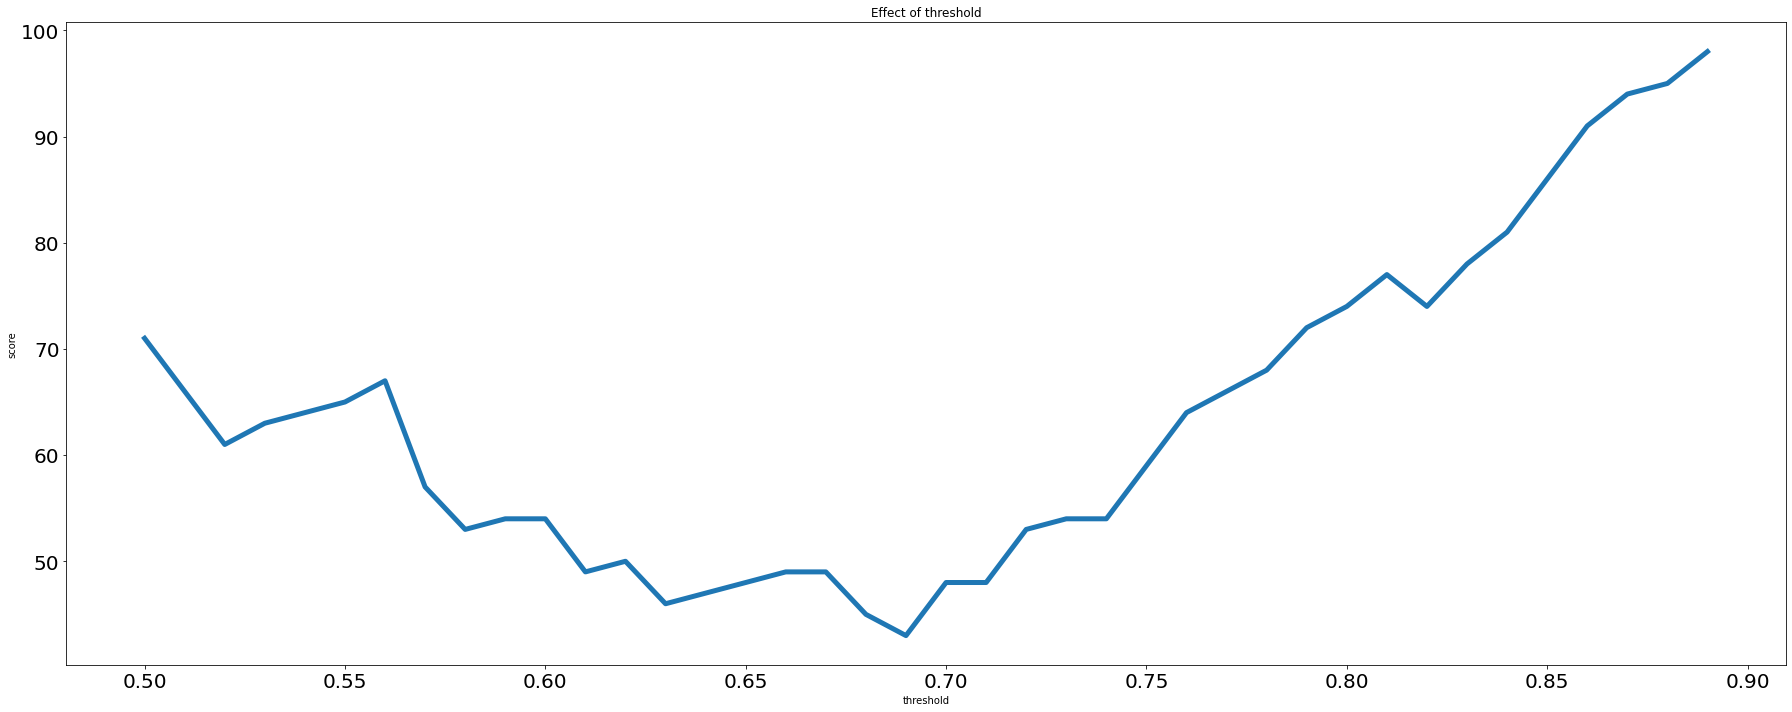

In [26]:
'''
Here, we give a lot of weight to correctly classify a NON-spam email. Our goal is not to discard a true email.
'''

model2 = RandomForestClassifier(max_depth = 9,
                                max_features = 'auto',
                                n_estimators = 300,
                                random_state = 0,
                                criterion = 'gini')
model2.fit(X_train, y_train)

def scores(y_pred,y_test):
    return 5*(confusion_matrix(y_test,y_pred)[1][0])+(confusion_matrix(y_test,y_pred)[0][1])

randomprob = model2.predict_proba(X_test)
randomforestprob = randomprob[:, 1].reshape(-1, 1).copy()

P = np.zeros((len(X_test),1),dtype = int)
threshold = np.arange(0.5,0.9,0.01)
SCORE = []

for j in range(len(threshold)):
    for i in range(len(P)):
        if randomforestprob[i] >= threshold[j]:
            P[i] = 2
        elif randomforestprob[i] < threshold[j]:
            P[i] = 1
    SCORE.append((threshold[j],scores(y_test,P)))

score = [i[1] for i in SCORE]
thresholds = [i[0] for i in SCORE]

print('The lowest score we were able to reach is {} with threshold {}'.format(score[np.argmin(score)],thresholds[np.argmin(score)]))
print(' ')
plt.figure(figsize=(25,10))
plt.title("Effect of threshold")
plt.xlabel("threshold")
plt.ylabel("score")
plt.plot(threshold, score, linewidth=5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tight_layout()

In [182]:
P = np.zeros((len(X_test),1),dtype = int)

for j in range(len(threshold)):
    for i in range(len(P)):
        if randomforestprob[i] >= 0.69:
            P[i] = 2
        elif randomforestprob[i] < 0.69:
            P[i] = 1

confusion_matrix(P,y_test)

array([[384,  38],
       [  1, 198]], dtype=int64)

# Cat Boosting

In [100]:
catclass = CatBoostClassifier()

grid = {'learning_rate': [0.05, 0.1],
        'random_strength': [0.5,1],
        'random_seed':[0,42]}

grid_search_result = catclass.grid_search(grid, X=X_train, y=y_train, cv = 5)


bestTest = 0.1269636584
bestIteration = 707

0:	loss: 0.1269637	best: 0.1269637 (0)	total: 18.3s	remaining: 2m 8s

bestTest = 0.1255253635
bestIteration = 269

1:	loss: 0.1255254	best: 0.1255254 (1)	total: 35.9s	remaining: 1m 47s

bestTest = 0.1265702423
bestIteration = 597

2:	loss: 0.1265702	best: 0.1255254 (1)	total: 54.5s	remaining: 1m 30s

bestTest = 0.130372609
bestIteration = 363

3:	loss: 0.1303726	best: 0.1255254 (1)	total: 1m 13s	remaining: 1m 13s

bestTest = 0.1289686784
bestIteration = 611

4:	loss: 0.1289687	best: 0.1255254 (1)	total: 1m 35s	remaining: 57s

bestTest = 0.1268062292
bestIteration = 241

5:	loss: 0.1268062	best: 0.1255254 (1)	total: 1m 53s	remaining: 37.7s

bestTest = 0.1253209965
bestIteration = 579

6:	loss: 0.1253210	best: 0.1253210 (6)	total: 2m 13s	remaining: 19.1s

bestTest = 0.1290576214
bestIteration = 238

7:	loss: 0.1290576	best: 0.1253210 (6)	total: 2m 32s	remaining: 0us
Estimating final quality...


In [101]:
grid_search_result['params']

{'random_strength': 1, 'random_seed': 42, 'learning_rate': 0.05}

In [103]:
model3 = CatBoostClassifier(learning_rate = 0.05,
                            random_strength = 1,
                            random_seed = 42,
                            silent = True)

model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

accuracy = cross_val_score(model3, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy for CatBoost: {}'.format(accuracy))

Accuracy for CatBoost: 0.9538865262939528


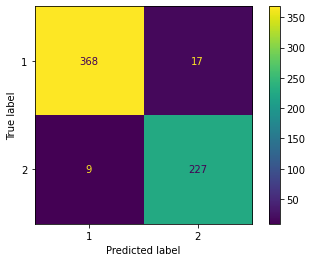

 
Precision score for CatBoost: 0.9761273209549072


In [104]:
plot_confusion_matrix(model3, X_test, y_test)  
plt.show()
print(' ')
print('Precision score for CatBoost: {}'.format(metrics.precision_score(y_test, y_pred)))

The lowest score we were able to reach is 31 with threshold 0.8500000000000003
 


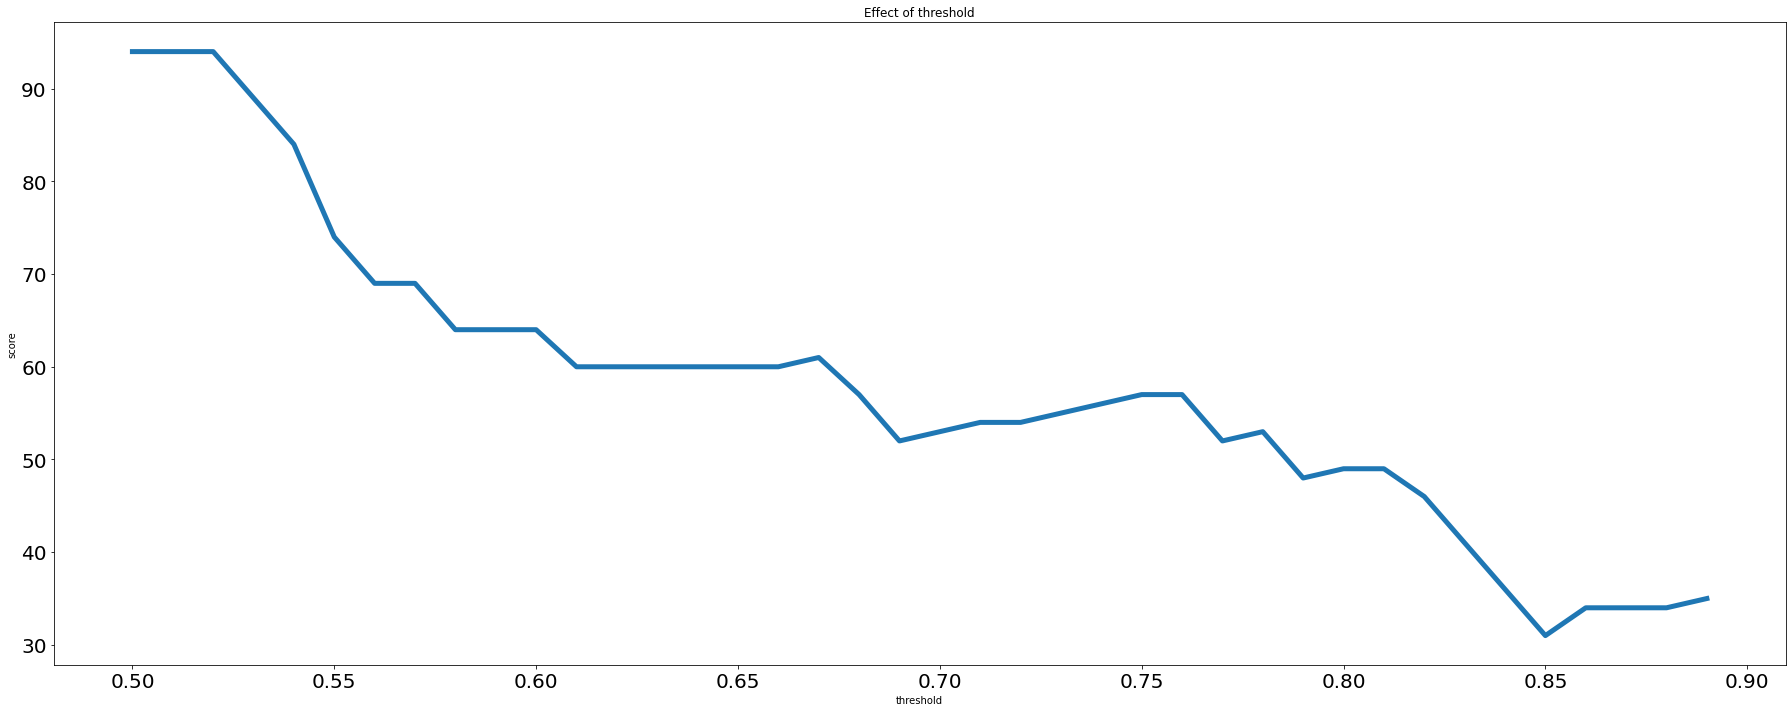

In [6]:
'''
Here, we give a lot of weight to correctly classify a NON-spam email. Our goal is not to discard a true email.
'''

model3 = CatBoostClassifier(learning_rate = 0.05,
                            random_strength = 1,
                            random_seed = 42,
                            silent = True)

model3.fit(X_train, y_train)

def scores(y_pred,y_test):
    return 5*(confusion_matrix(y_test,y_pred)[1][0])+(confusion_matrix(y_test,y_pred)[0][1])

catpr = model3.predict_proba(X_test)
catboostpr = catpr[:, 1].reshape(-1, 1).copy()

P = np.zeros((len(X_test),1),dtype = int)
threshold = np.arange(0.5,0.9,0.01)
SCORE = []

for j in range(len(threshold)):
    for i in range(len(P)):
        if catboostpr[i] >= threshold[j]:
            P[i] = 2
        elif catboostpr[i] < threshold[j]:
            P[i] = 1
    SCORE.append((threshold[j],scores(y_test,P)))

score = [i[1] for i in SCORE]
thresholds = [i[0] for i in SCORE]

print('The lowest score we were able to reach is {} with threshold {}'.format(score[np.argmin(score)],thresholds[np.argmin(score)]))
print(' ')
plt.figure(figsize=(25,10))
plt.title("Effect of threshold")
plt.xlabel("threshold")
plt.ylabel("score")
plt.plot(threshold, score, linewidth=5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tight_layout()

In [181]:
P = np.zeros((len(X_test),1),dtype = int)

for j in range(len(threshold)):
    for i in range(len(P)):
        if catboostpr[i] >= 0.85:
            P[i] = 2
        elif catboostpr[i] < 0.85:
            P[i] = 1

confusion_matrix(P,y_test)

array([[383,  21],
       [  2, 215]], dtype=int64)

# XGBoost

In [114]:
clf_xgb = XGBClassifier(objective = 'reg:pseudohubererror')
param_dist = {'n_estimators': [200,300,500,1000],
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, error_score = 0, n_jobs = -1)

clf.fit(X_train,y_train)

C:\Users\alber\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estima...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000205C0F1A580>,
                                        'lear

In [115]:
clf.best_params_

{'colsample_bytree': 0.5927233243062743,
 'learning_rate': 0.020769569843090634,
 'max_depth': 9,
 'min_child_weight': 2,
 'n_estimators': 300,
 'subsample': 0.7164980504400185}

In [120]:
import warnings
warnings.simplefilter('always')
warnings.filterwarnings('ignore')

model4 = XGBClassifier(n_estimators = 300,
                       learning_rate = 0.020769569843090634,
                       subsample = 0.7164980504400185,
                       max_depth = 9,
                       colsample_bytree = 0.5927233243062743,
                       min_child_weight = 2,
                       objective = 'binary:logistic',
                       eval_metric = 'rmse')

model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

accuracy = cross_val_score(model4, X, y, cv = 10, scoring='accuracy').mean()
print('Accuracy for XGBoost: {}'.format(accuracy))

Accuracy for XGBoost: 0.9490488538533347


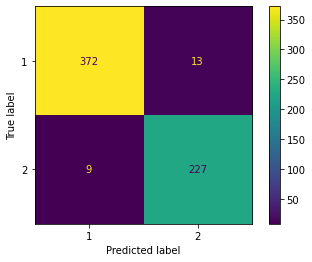

 
Precision score for Random Forest: 0.9763779527559056


In [121]:
plot_confusion_matrix(model4, X_test, y_test)  
plt.show()
print(' ')
print('Precision score for Random Forest: {}'.format(metrics.precision_score(y_test, y_pred)))

C:\Users\alber\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The lowest score we were able to reach is 33 with threshold 0.7200000000000002
 


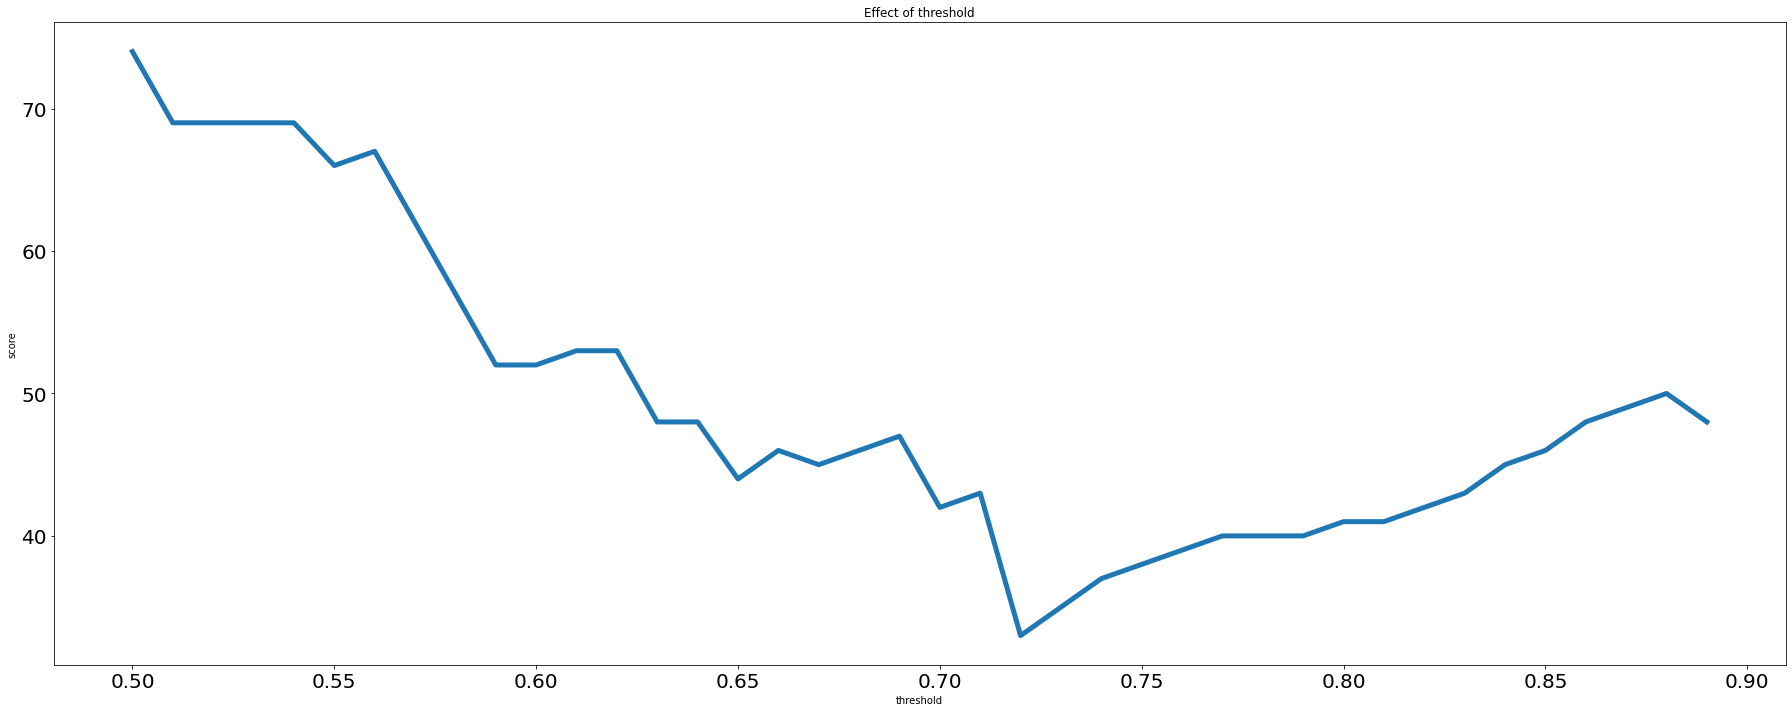

In [7]:
'''
Here, we give a lot of weight to correctly classify a NON-spam email. Our goal is not to discard a true email.
'''

model4 = XGBClassifier(n_estimators = 300,
                       learning_rate = 0.020769569843090634,
                       subsample = 0.7164980504400185,
                       max_depth = 9,
                       colsample_bytree = 0.5927233243062743,
                       min_child_weight = 2,
                       objective = 'binary:logistic',
                       eval_metric = 'rmse')

model4.fit(X_train, y_train)

def scores(y_pred,y_test):
    return 5*(confusion_matrix(y_test,y_pred)[1][0])+(confusion_matrix(y_test,y_pred)[0][1])

xgprob = model4.predict_proba(X_test)
xgboostprob = xgprob[:, 1].reshape(-1, 1).copy()

P = np.zeros((len(X_test),1),dtype = int)
threshold = np.arange(0.5,0.9,0.01)
SCORE = []

for j in range(len(threshold)):
    for i in range(len(P)):
        if xgboostprob[i] >= threshold[j]:
            P[i] = 2
        elif xgboostprob[i] < threshold[j]:
            P[i] = 1
    SCORE.append((threshold[j],scores(y_test,P)))

score = [i[1] for i in SCORE]
thresholds = [i[0] for i in SCORE]

print('The lowest score we were able to reach is {} with threshold {}'.format(score[np.argmin(score)],thresholds[np.argmin(score)]))
print(' ')
plt.figure(figsize=(25,10))
plt.title("Effect of threshold")
plt.xlabel("threshold")
plt.ylabel("score")
plt.plot(threshold, score, linewidth=5)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tight_layout()

In [180]:
P = np.zeros((len(X_test),1),dtype = int)

for j in range(len(threshold)):
    for i in range(len(P)):
        if xgboostprob[i] >= 0.72:
            P[i] = 2
        elif xgboostprob[i] < 0.72:
            P[i] = 1
            
confusion_matrix(P, y_test)

array([[383,  23],
       [  2, 213]], dtype=int64)

# Mix

In [72]:
def scoringfunct(algo1, algo2):
    P = np.zeros((len(X_test),1),dtype = int)
    threshold = np.arange(0.5,1,0.01)
    add = np.arange(-0.5,0.5,0.01)
    SCORE = []
    for j in range(len(threshold)):
        for k in range(len(add)):
            for i in range(len(P)):
                if algo1[i] >= threshold[j] and algo2[i] >= threshold[j] + add[k]:
                    P[i] = 2
                else:
                    P[i] = 1
            SCORE.append((threshold[j],add[k],scores(y_test,P)))
    risultati = [i[2] for i in SCORE]
    return SCORE[np.argmin(risultati)]

In [73]:
a = [xgboostprob,catboostpr,gradientboostingprob,randomforestprob]

vv = []

for i in range(len(a)):
    for j in range(i+1,len(a)):
        vv.append([i,j,scoringfunct(a[i],a[j])])

In [74]:
vv

[[0, 1, (0.7200000000000002, -0.5, 28)],
 [0, 2, (0.7200000000000002, -0.2599999999999998, 28)],
 [0, 3, (0.7200000000000002, -0.19999999999999973, 32)],
 [1, 2, (0.8500000000000003, -0.5, 31)],
 [1, 3, (0.8500000000000003, -0.5, 35)],
 [2, 3, (0.8200000000000003, -0.5, 36)]]

The only one that reduced the score in predicting best the NON-SPAM emails was the combination between XGBoost and CatBoost classifiers, which led to a final score of 28, together with the combination between Gradient Boosting and XGBoost. 

In [80]:
P = np.zeros((len(X_test),1),dtype = int)
for i in range(len(P)):
    if xgboostprob[i] >= 0.72 and catboostpr[i] >= 0.22:
        P[i] = 2
    else:
        P[i] = 1
        
confusion_matrix(P, y_test)

array([[384,  23],
       [  1, 213]], dtype=int64)

In [81]:
P = np.zeros((len(X_test),1),dtype = int)
for i in range(len(P)):
    if xgboostprob[i] >= 0.72 and gradientboostingprob[i] >= 0.46:
        P[i] = 2
    else:
        P[i] = 1
        
confusion_matrix(P, y_test)

array([[384,  23],
       [  1, 213]], dtype=int64)

So, our final best choice is able to miss just 1 of the 214 NON-SPAM emails